## Saheed Adisa Ganiyu

In [1]:
#importing all the necessary packages
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
from numpy.linalg import inv

**1.** Minimize

$$f_1(x,\mkern1mu y,\mkern1mu z) = \exp(13 x + 21 y - 34 z) + \exp(-21 x 
- 34 y + 55 z) + \bigl( \exp(2 y + z) + \exp(-2 x - z) \bigr) / 1000$$

In [2]:
# Damped newton method
def damped_newton1(f, df, Hf, x0, a=0.25, b=0.5, st=1000):
    """
    Damped newton method for finding optimum values
    """
    t=1; alpha=a; beta=b
    x=x0; x_tab=np.copy(x)
    F=f; dF=df; HF=Hf
    stop=st; counter2=0
    eps=np.finfo(float).eps
    # Stoping criterial
    while (((LA.norm(df(x)))>= 1e-10) and counter2 < stop):
        # Picking direction: gradient descent
        dx = -np.linalg.solve(HF(x),dF(x))
        if np.dot(dx,dF(x))>0:
            dx=-t*dx
        flag = 0
        # Line search : backtracking
        while (F(x+dx)>= (F(x)+alpha*np.dot(dF(x),dx))):
            dx =dx*beta
            if (LA.norm(dx)< np.finfo(float).eps):
                if (flag==1):
                    break
                dx = -dF(x); flag=1
        # Update x
        x = x + dx
        x_tab = np.vstack((x_tab,x))
        counter2 +=1
    print("x_min =",x,"\t", "f(min) =",F(x),"\t no_iter =",counter2)
    return x, x_tab

In [3]:
# BFGS method 
def BFGS1(f, df, x0, st=1000):
    x=x0; stop = st
    F = f(x); dF = df(x) 
    counter = 0
    C = np.eye(len(x)); x_tab = np.copy(x)
    x_old= np.array([100,100])
    while (LA.norm(dF)>1.e-10) and counter < stop:
        #print(LA.norm(dF))
        d = -np.matmul(C,dF)
        #print(np.dot(d,dF))
        if np.dot(d,dF)>0:
            d = -d
        while (f(x+d)>=F):
            d=0.9*d
            if (LA.norm(d)<1.11e-16):
                C = np.eye(len(x))
                d = -dF
                #print(counter)
        x_old = x
        x = x+d; F=f(x); x_tab = np.vstack((x_tab,x))
        counter += 1
        new_dF = df(x); g = new_dF - dF; dF = new_dF; I = np.eye(len(x)) 
        rho = 1/(np.matmul(g.T,d))
        tempA1 = np.outer(d,g); tempA2 = np.outer(g,d); tempA3 = np.outer(d,d)
        tempB1 = I - tempA1*rho; tempB2 = I - tempA2*rho; tempB3 = tempA3*rho;
        C = tempB1@C@tempB2 + tempB3
    print("x_min =",x,"\t", "f(x_opt) =",f(x),"\t no_iter =",counter)
    return x, x_tab

In [4]:
# function definition
def f1(X):
    x = X[0]
    y = X[1]
    z = X[2]
    fac1 = np.exp(13*x - 21*y - 34*z)
    fac2 = np.exp(-21*x - 34*y + 55*z)
    fac3 = np.exp(2*y + z) + np.exp(-2*x - z)
    func = fac1 + fac2 + fac3/1000
    return func

# gradient definition
def df1(X):
    x = X[0]
    y = X[1]
    z = X[2]
    fac1 = np.exp(13*x - 21*y - 34*z)
    fac2 = np.exp(-21*x - 34*y + 55*z)
    fac3 = np.exp(2*y + z)
    fac4 = np.exp(-2*x - z)
    fx = 13*fac1 - 1/500*fac4 - 21*fac2
    fy = -21*fac1 - 34*fac2 + 1/500*fac3
    fz = -34*fac1 - 1/1000*fac4 + 55*fac2 + 1/1000*fac3
    df = np.array([fx,fy,fz])
    return df

# Hessian Matrix
def Hf1(X):
    x = X[0]
    y = X[1]
    z = X[2]
    fac1 = np.exp(13*x - 21*y - 34*z)
    fac2 = np.exp(-21*x - 34*y + 55*z)
    fac3 = np.exp(2*y + z)
    fac4 = np.exp(-2*x - z)
    fxx = 169*fac1 + 1/250*fac4 + 441*fac2
    fxy = -273*fac1 + 714*fac2
    fxz = -442*fac1 + 1/500*fac4 - 1155*fac2
    fyy = 441*fac1 + 1156*fac2 + 1/250*fac3
    fyz = 714*fac1 - 1870*fac2 + 1/500*fac3
    fzz = 1156*fac1 + 1/1000*fac4 + 3025*fac2 + 1/1000*fac3
    Hf = np.array([[fxx,fxy,fxz],[fxy,fyy,fyz],[fxz,fyz,fzz]])
    return Hf
    

In [5]:
# Using damped Newton method to find minimum 
x = np.array([2,1,1])
x,x_tab=damped_newton1(f1, df1, Hf1, x, a=0.25, b=0.5, st=1000)

x_min = [0.37509284 0.35503302 0.18378635] 	 f(min) = 0.0030373436861604593 	 no_iter = 9


In [6]:
# BFGS method to find minimum
x = np.array([2,1,1])
x, x_tab = BFGS1(f1, df1, x, st=1000)

x_min = [0.37509284 0.35503302 0.18378635] 	 f(x_opt) = 0.0030373436861604593 	 no_iter = 36


**Result#1:** Using damped Newton, and BFGS method, we found minimum value of $0.0030373436861604593$ at point (0.37509284, 0.35503302, 0.18378635)

**2.** Let $y(x) = \frac45 + c_1 x + c_2 x^2 + c_3 x^3$. Minimize



$$ f_2(c_1,\mkern1mu c_2,\mkern1mu c_3) = \int\limits_0^1 \mkern-5mu d 
 x \; \Bigl( \frac{d y}{d x} - y^2 \Bigr)^2 $$



Plot $1 / y(x)$ as a function of $x$, over the range $0 \le x \le 
1$, for the optimal values of $c_1$, $c_2$, and $c_3$.

In [7]:
# Function definition
def f2(C,x):
    c1 = C[0]; c2 = C[1]; c3 = C[2]
    y_prime = c1 + 2*c2*x + 3*c3*x**2
    y = (4/5) + c1*x + c2*x**2 + c3*x**3
    f = y_prime - y**2
    return f**2

#simpsons rule
def simpsons(f,C,a,b,N=1e8):
    int_length = b-a
    step_size = int_length/N
    y = 0
    for idx in range(int(N/2)):
        x1 = a + 2*idx*step_size
        x2 = x1 + step_size
        x3 = x2 + step_size
        y = y + (f(C,x1) + 4*f(C,x2) + f(C,x3)) * step_size / 3
    return y

def df3(simp,f, C, a, b, N=1e4, eps: float = 1e-4):
    grad = np.zeros_like(C)
    for i in range(len(C)):
        dx = np.zeros_like(C)
        dx[i] = eps
        grad[i] = (simp(f,C + dx,a,b, N ) - simp(f,C - dx,a,b, N )) / (2 * eps)
    return grad 

In [8]:
# BFGS method adapted to the case of the question
def BFGS2(simp,f, df, c, a, b, N=1e4, st=1000):
    stop = st; ff = simp
    F = ff(f,c,a,b, N ); dF = df(simp,f, c, a, b, N, eps= 1e-4) 
    counter = 0
    C = np.eye(len(c)); c_tab = np.copy(c)
    c_old= np.array([100,100,100])
    while (LA.norm(dF)>1.e-10) and counter < stop:
        #print(LA.norm(dF))
        d = -np.matmul(C,dF)
        #print(np.dot(d,dF))
        if np.dot(d,dF)>0:
            d = -d
        while (ff(f,c+d,a,b, N)>=F):
            d=0.9*d
            if (LA.norm(d)<1.11e-16):
                C = np.eye(len(x))
                d = -dF
                #print(counter)
        c_old = c
        c = c+d; F=ff(f,c,a,b, N); c_tab = np.vstack((c_tab,c))
        counter += 1
        new_dF = df(simp,f, c, a, b, N, eps= 1e-4); g = new_dF - dF; dF = new_dF; I = np.eye(len(c)) 
        rho = 1/(np.matmul(g.T,d))
        tempA1 = np.outer(d,g); tempA2 = np.outer(g,d); tempA3 = np.outer(d,d)
        tempB1 = I - tempA1*rho; tempB2 = I - tempA2*rho; tempB3 = tempA3*rho;
        C = tempB1@C@tempB2 + tempB3
    print("C_min =",c,"\t", "f(x_min) =",ff(f,c,a,b, N ),"\t no_iter =",counter)
    return c, c_tab

In [9]:
# Using BFGS method
a = 0; b = 1; N =1e6
C = np.array([0.4,0,1])
c, c_tab = BFGS2(simpsons,f2, df3, C, a, b, N=1e4, st=1000)

C_min = [ 0.5104036  -0.9069906   1.73738544] 	 f(x_min) = 0.07725392259864235 	 no_iter = 18


**Result#2:** Using BFGS method, we found minimum value of $0.07725392259864235$ at point (0.5104036, -0.9069906, 1.73738544)

Text(0.5, 1.0, 'plot of opt. value for c(s)')

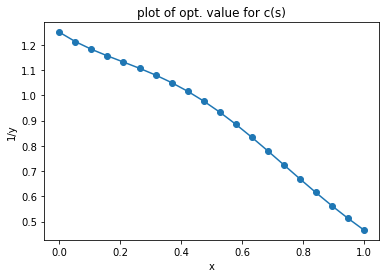

In [10]:
# Ploting
X = np.linspace(0,1,20)
y = np.array([(4/5) + c[0]*x + c[1]*x**2 + c[2]*x**3 for x in X])
plt.plot(X,1/y, marker = "o")
plt.xlabel('x')
plt.ylabel('1/y')
plt.title('plot of opt. value for c(s)')

**3.** \
$\quad \quad \quad$ Maximize $f_3(x,\mkern1mu y,\mkern1mu z) = x^2 + y^2 + z^2$ 
subject to $x^4 + y^4 + z^4 + 10 y^2 + 16 z^2 = 154$.

Using
$$
f_t(\boldsymbol{x}):=f(\boldsymbol{x})+t \sum_{i=1}^{n_{\mathrm{eq}}} h_i^2(\boldsymbol{x})
$$

In [11]:
# Damped newton method
def damped_newton3(f, df, Hf, x0, t=10, a=0.25, b=0.5, st=1000):
    """
    Damped newton method for finding optimum values
    """
    alpha=a; beta=b
    x=x0; x_tab=np.copy(x)
    F=f; dF=df; HF=Hf
    stop=st; counter=0
    eps=np.finfo(float).eps
    while (t<2.e+8):
        counter=0
        # Stoping criterial
        while (((LA.norm(df(x,t)))>= 1e-10) and counter < stop):
            # Picking direction: gradient descent
            dx = -np.linalg.solve(HF(x,t),dF(x,t))
            if np.dot(dx,dF(x,t))>0:
                dx=-dx
            flag = 0
            # Line search : backtracking
            while (F(x+dx,t)[0]>= (F(x,t)[0]+alpha*np.dot(dF(x,t),dx))):
                dx =dx*beta
                if (LA.norm(dx)< np.finfo(float).eps):
                    if (flag==1):
                        break
                    dx = -dF(x,t); flag=1
            # Update x
            x = x + dx
            x_tab = np.vstack((x_tab,x))
            counter +=1
        t = t*10
    print("x_max =",x,"\t", "f(max) =",F(x,t)[1],"\t no_iter =",counter)
    return x, x_tab

In [12]:
# This is the gradient method adapted to the case of 
# equality constrainst using Barrier approach
def gradient3(f, df, x0, t=10, alpha = 0.1, beta = 0.5, st=1000 ):
    """
    Grdient Descent Metthod with Backtracking
    """
    x=x0; x_tab=np.copy(x0)
    F = f; dF =df; counter = 0
    while (t<1e+10):
        counter = 0
        while ((LA.norm(dF(x,t)))>= 1e-10) and (counter< st): # Stoping criterial
            # Picking direction: gradient descent
            dx = -dF(x,t)
            if np.dot(dx,dF(x,t))>0:
                dx=-dx
            # Line search : backtracking
            while (F(x+dx,t)[0])>= (F(x,t)[0]+alpha*np.matmul(dF(x,t),dx)):
                dx =dx*beta
            # Update x
            x = x + dx
            x_tab = np.vstack((x_tab,x))
            counter +=1
        t = 10*t
    print("x_max =",x,"\t", "f(x_max) =",F(x,t)[1],"\t no_iter =",counter)
    return x, x_tab

In [13]:
def ft(X,t):
    x = X[0]; y = X[1]; z = X[2]
    f = x**2+y**2+z**2
    h = x**4 + y**4 +z**4 + 10*y**2 + 16*z**2 - 154
    func = -f + t*h**2
    return func, f, h

# gradient definition
def dft(X,t):
    x = X[0]; y = X[1]; z = X[2]
    h = x**4 + y**4 + z**4 + 10*y**2 + 16*z**2 - 154 
    fx = 8*(h)*t*x**3 - 2*x
    fy = 8*(h)*(y**3 + 5*y)*t - 2*y
    fz = 8*(h)*(z**3 + 8*z)*t - 2*z
    df = np.array([fx,fy,fz])
    return df

# Hessian Matrix
def Hft(X,t):
    x = X[0]; y = X[1]; z = X[2]
    h = x**4 + y**4 + z**4 + 10*y**2 + 16*z**2 - 154  
    fxx = 32*t*x**6 + 24*(h)*t*x**2 - 2
    fxy = 32*(y**3 + 5*y)*t*x**3
    fxz = 32*(z**3 + 8*z)*t*x**3
    fyy = 32*(y**3 + 5*y)**2*t + 8*(h)*(3*y**2 + 5)*t - 2
    fyz = 32*(y**3 + 5*y)*(z**3 + 8*z)*t
    fzz = 32*(z**3 + 8*z)**2*t + 8*(h)*(3*z**2 + 8)*t - 2
    Hf = np.array([[fxx,fxy,fxz],[fxy,fyy,fyz],[fxz,fyz,fzz]])
    return Hf 

In [14]:
# Using Damped Newton method
x = np.array([0.2,0.4,0.1])
x, x_tab = damped_newton3(ft, dft, Hft, x, t=10, a=0.25, b=0.5, st=1000)

x_max = [3. 2. 1.] 	 f(max) = 14.000000000015435 	 no_iter = 1000


**Result#3a:** Using damped Newton method, we found maximum value of $14.000000000015435$ at point (3., 2., 1.)

In [15]:
# Using gradient method
x = np.array([2.5,1.2,1])
x,x_tab = gradient3(ft, dft, x, t=1, alpha = 0.25, beta = 0.5, st=3000 )

x_max = [3.03636263 1.75188525 1.27983171] 	 f(x_max) = 13.92656914842118 	 no_iter = 3000


**Result#3b:** Using gradient method, we found maximum value of $13.92656914842118$ at point (3.03636263, 1.75188525, 1.27983171)

**4.** Maximize



$$f_4(x_1,\mkern1mu y_1,\mkern1mu x_2,\mkern1mu y_2,\mkern1mu 
x_3,\mkern1mu y_3,\mkern1mu x_4,\mkern1mu y_4) = \sum_{i = 1}^3 \sum_{j 
= i + 1}^4 \Bigl[ (x_i - x_j)^2 + (y_i - y_j)^2 \Bigr]$$



subject to $x_i^2 + y_i^2 \le 1$, where $1 \le i \le 4$.

In [16]:
# BFGS method 
def BFGS4(f, df, x0, t, st=1000):
    x=x0; stop = st 
    counter = 0
    x_tab = np.copy(x)
    x_old= np.array([100,100,100,100,100,100,100,100])
    while (t < 5e5):
        C = np.eye(len(x))
        F = f(x, t)[0];  dF = df(f,x,t)
        while (LA.norm(dF)>1.e-10) and counter < stop:
            #print(LA.norm(dF))
            d = -np.matmul(C,dF)
            #print(np.dot(d,dF))
            if np.dot(d,dF)>0:
                d = -d
                #print(np.dot(d,dF))
            while (f(x+d,t)[2]>0) or (f(x+d,t)[0]>=F):
                d=0.9*d
                #print(counter)
                if (LA.norm(d)<1.11e-16):
                    C = np.eye(len(x))
                    d = -dF
                    #print(counter)
            x_old = x
            x = x+d; F=f(x,t)[0]; x_tab = np.vstack((x_tab,x))
            counter += 1
            new_dF = df(f,x,t); g = new_dF - dF; dF = new_dF; I = np.eye(len(x)) 
            rho = 1/(np.matmul(g.T,d))
            tempA1 = np.outer(d,g); tempA2 = np.outer(g,d); tempA3 = np.outer(d,d)
            tempB1 = I - tempA1*rho; tempB2 = I - tempA2*rho; tempB3 = tempA3*rho;
            C = tempB1@C@tempB2 + tempB3
        t = 10*t
    print("x_max =",x,"\t", "f(x_max) =",f(x,t)[1],"\t no_iter =",counter, "ineq=", f(x,t)[3])
    return x, x_tab

In [17]:
# Damped newton method
def damped_newton4(f, df, Hf, x0, t=10, a=0.25, b=0.5, st=1000):
    """
    Damped newton method for finding optimum values
    """
    alpha=a; beta=b
    x=x0; x_tab=np.copy(x)
    F=f; dF=df; HF=Hf
    stop=st; counter=0
    eps1=np.finfo(float).eps
    while (t<1.e+5):
        #counter=0
        # Stoping criterial
        while (((LA.norm(df(f,x,t)))>= 1e-4) and counter < stop):
            # Picking direction: gradient descent
            dx = -np.linalg.solve(HF(f,df,x,t),dF(f,x,t))
            if np.dot(dx,dF(f,x,t))>0:
                dx=-dx
            flag = 0
            # Line search : backtracking
            while (F(x+dx,t)[2]>=0) or (F(x+dx,t)[0]>= (F(x,t)[0]+alpha*np.dot(dF(f,x,t),dx))):
                dx =dx*beta
                #print(counter)
                if (LA.norm(dx)< np.finfo(float).eps):
                    if (flag==1):
                        break
                    dx = -dF(f,x,t); flag=1
            # Update x
            x = x + dx
            x_tab = np.vstack((x_tab,x))
            counter +=1
        t = t*10
    print("x_max =",x,"\t", "f(max) =",F(x,t)[1],"\t no_iter =",counter, "ineq = ", F(x,t)[3])
    return x, x_tab

In [18]:
# function definition
def f4(X,t):
    x = X[0::2]; y = X[1::2]
    n = len(x)
    f = 0; F = 0; f2=0
    g1 = x[0]**2+y[0]**2-1; g2 = x[1]**2+y[1]**2-1
    g3 = x[2]**2+y[2]**2-1; g4 = x[3]**2+y[3]**2-1
    ineq = np.array([g1,g2,g3,g4])
    Max =max(np.array([g1,g3,g2,g4]))
    for i in range(3):
        for j in range(i+1,4):
            f -= (x[i] - x[j])**2 + (y[i] - y[j])**2
            f2 += (x[i] - x[j])**2 + (y[i] - y[j])**2
    f = f - np.log(np.prod(ineq))/t
    return f, f2, Max, ineq

# finite difference for gradient
def df4(func, x, t, eps: float = 1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        dx = np.zeros_like(x)
        dx[i] = eps
        grad[i] = (func(x + dx, t)[0] - func(x - dx, t)[0]) / (2 * eps)
    return grad

#finite difference for Hessian
def Hf4(f, df, x, t, eps: float = 1e-5):
    n = len(x); #delta = np.sqrt(eps)
    D = eps*np.eye(n); #df0 = df(f,x,t)
    dfdx = np.zeros_like(D)
    for i in range(len(x)):
        dfdx[:,i] = (df(f, x + D[:, i], t) - df(f, x - D[:, i], t)) / 2*eps;
    return dfdx

In [19]:
# Using BFGS method with logarithm barrier approach
x = np.array([ 0.7,  0.7, -0.7, -0.7, 0.7,  0.7, -0.7,  0.7])
x,x_tab=BFGS4(f4, df4, x, t=100, st=100)

x_max = [ 0.73487567  0.67805569 -0.66542753 -0.74645572  0.73487563  0.67805566
 -0.73494386  0.67796857] 	 f(x_max) = 14.334719342897204 	 no_iter = 5 ineq= [-1.98231613e-04 -1.00532763e-05 -1.98322079e-04 -2.16141099e-04]


/tmp/ipykernel_40784/562759732.py:14: RuntimeWarning: invalid value encountered in log
  f = f - np.log(np.prod(ineq))/t


**Result#4a:** Using BFGS Method with randomly generated initial values, we found optimum value of $14.334719342897204$ at point showing in the above results

In [23]:
x = np.array([ 0.7,  0.7, -0.7, -0.7, 0.7,  0.7, -0.7,  0.7])
t=10
df4(f4, x, t)

array([ 1.40000118,  4.20000118, -1.40000118,  1.39999882,  1.40000118,
        4.20000118, -1.40000118,  4.20000118])

In [20]:
# Using damped Newton method 
x ,t= np.array([ 0.7,  0.7, -0.7, -0.7, 0.7,  0.7, -0.7,  0.7]), 10
x, x_tab = damped_newton4(f4, df4, Hf4, x, t=100, a=0, b=0.5, st=1000)

/tmp/ipykernel_40784/562759732.py:14: RuntimeWarning: invalid value encountered in log
  f = f - np.log(np.prod(ineq))/t


x_max = [ 0.94005649  0.33733466 -0.94005647 -0.33733471  0.99703583 -0.05847938
 -0.99703582  0.05847943] 	 f(max) = 15.960009228003146 	 no_iter = 1000 ineq =  [-0.00249912 -0.00249912 -0.00249972 -0.00249972]


**Result#4b:** Using damped Newton method, we found optimum value of $15.960009228003146$ at point showing in the above results

**5.** An elastic ring between two vertical sheets of glass (so it 
does not fall, and $z = 0$) is standing on a table ($y \ge 0)$. Minimize


 $$ f_5(x_1,\mkern1mu x_2,\mkern1mu ...,\mkern1mu x_{20},\mkern1mu 
y_1,\mkern1mu y_2,\mkern1mu ...,\mkern1mu y_{20}) = \sum_{n = 1}^{20} 
\mkern1mu \Bigl[ \mkern1mu {\textstyle\frac{1}{150}} \mkern1.5mu y_n + 
\bigl( x_{n - 1} - 2 x_n + x_{n + 1} \bigr)^2 + \bigl( y_{n - 1} - 2 y_n 
+ y_{n + 1} \bigr)^2 \mkern0.5mu \Bigr] $$


subject to $(x_n - x_{n - 1})^2 + (y_n - y_{n - 1})^2 = (1 / 20)^2$ 
for all $1 \le n \le 20$ equality constraints, and $y_n \ge 0$ for all 
$1 \le n \le 20$ inequality constraints. The manipulations with indices 
are done modulo $20$, so $(x_0,\mkern1mu y_0)$ and $(x_{21},\mkern1mu 
y_{21})$ are identified with $(x_{20},\mkern1mu y_{20})$ and 
$(x_1,\mkern1mu y_1)$, respectively. Plot the solution by drawing points 
$(x_n,\mkern1mu y_n)$ and connecting consecutive points by segments on 
the $xy$-plane.

In [25]:
# BFGS method 
def BFGS5(f, df, x0, t, st=1000):
    x=x0; stop = st 
    counter = 0
    x_tab = np.copy(x)
    x_old= 0 #np.array([100,100])
    C = np.eye(len(x))
    F = f(x, t)[0];  dF = df(f,x,t)
    while (t < 5e+5):
        C = np.eye(len(x))
        F = f(x, t)[0];  dF = df(f,x,t)
        while (LA.norm(dF)>1.e-2) and counter < stop:
            #print(LA.norm(dF))
            d = -np.matmul(C,dF)
            #print(np.dot(d,dF))
            if np.dot(d,dF)>0:
                d = -d
                #print(np.dot(d,dF))
            while (f(x+d,t)[0]>=F): #or ( (f(x+d,t)[3])):
                d=0.9*d
                #print(counter)
                if (LA.norm(d)<1.11e-16):
                    C = np.eye(len(x))
                    d = -dF
                    #print(counter)
            x_old = x
            x = x+d; F=f(x,t)[0]; x_tab = np.vstack((x_tab,x))
            counter += 1
            new_dF = df(f,x,t); g = new_dF - dF; dF = new_dF; I = np.eye(len(x)) 
            rho = 1/(np.matmul(g.T,d))
            tempA1 = np.outer(d,g); tempA2 = np.outer(g,d); tempA3 = np.outer(d,d)
            tempB1 = I - tempA1*rho; tempB2 = I - tempA2*rho; tempB3 = tempA3*rho;
            C = tempB1@C@tempB2 + tempB3
        t = 10*t
    print("x_min =",x,"\t", "f(x_min) =",f(x,t)[1],"\t no_iter =",counter, )
    return x, x_tab

In [26]:
# function definition
def ft5(X,t): # f_t(x,y)
    x, y = X[0::2], X[1::2]; #print(len(x))
    x = np.append(np.insert(x,0,x[-1]),x[0]); #print("x2",len(x))
    y = np.append(np.insert(y,0,y[-1]),y[0])
    n1 = len(x); n2 = len(y) ; #print("n2=",n1)
    dx, dy =  x[1 : n1] - x[0 : n1-1], y[1 : n2] - y[0 : n2-1]; # print("dx",len(dx))
    h = 0; F3 = (y[n2-1]/150); F = (y[n2-1]/150) 
    for i in range(1, n1-1):
        F3 += (y[i]/150) + (dx[i] - dx[i - 1])**2 + (dy[i] - dy[i - 1])**2
        F += (y[i]/150) + (dx[i] - dx[i - 1])**2 + (dy[i] - dy[i - 1])**2
    for i in range(0, n1-1): # equality and inequality constraints terms
        F += t * (dx[i]**2 + dy[i]**2 - 0.05**2)**2 #- np.log(y[i])/t
        h += dx[i]**2 + dy[i]**2 - 0.05**2
    return F, F3, h, max(y[1:20])

def dft5(func, x, t, eps: float = 1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        dx = np.zeros_like(x)
        dx[i] = eps
        grad[i] = (func(x + dx, t)[0] - func(x - dx, t)[0]) / (2 * eps)
    return grad

def Hft5(f, df, x, t, eps: float = 1e-5):
    n = len(x); #delta = np.sqrt(eps)
    D = eps*np.eye(n); #df0 = df(f,x,t)
    dfdx = np.zeros_like(D)
    for i in range(len(x)):
        dfdx[:,i] = (df(f, x + D[:, i], t) - df(f, x - D[:, i], t)) / 2*eps;
    return dfdx

In [27]:
np.random.seed(0)
#x, t = np.random.randn(40), 1.
x, t = np.linspace(2,3,40), 1000.
x, x_tab = BFGS5(ft5, dft5, x, t, st=68)

x_min = [ 2.56232234 -0.22646759  2.51911767 -0.24988517  2.49396387 -0.23639109
  2.51658096 -0.22433408  2.50322136 -0.18541784  2.51296025 -0.16041639
  2.45799252 -0.14651247  2.43058642 -0.10418924  2.44839448 -0.08297052
  2.44798332 -0.04423564  2.43315997 -0.07848133  2.42729397 -0.08011293
  2.42457247 -0.1231537   2.45211078 -0.1160294   2.45899874 -0.09171073
  2.47257753 -0.06972113  2.50579473 -0.10769639  2.52939383 -0.1766544
  2.57685404 -0.23044371  2.56971056 -0.23826382] 	 f(x_min) = 0.02083345547563182 	 no_iter = 68


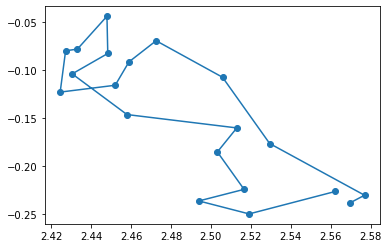

In [28]:
x1 = np.array([x[2 * i] for i in range(20)])
x2 = np.array([x[2 * i+1] for i in range(20)])
plt.plot(x1,x2, marker='o')

Trying Newton method

In [29]:
# Damped newton method
def damped_newton5(f, df, Hf, x0, t=10, a=0.25, b=0.5, st=1000):
    """
    Damped newton method for finding optimum values
    """
    alpha=a; beta=b
    x=x0; x_tab=np.copy(x)
    F=f; dF=df; HF=Hf
    stop=st; counter=0
    eps1=np.finfo(float).eps
    while (t<1.e+5):
        #counter=0
        # Stoping criterial
        while (((LA.norm(df(f,x,t)))>= 1e-4) and counter < stop):
            # Picking direction: gradient descent
            dx = -np.linalg.solve(HF(f,df,x,t),dF(f,x,t))
            #print(np.dot(dx,dF(f,x,t)))
            if np.dot(dx,dF(f,x,t))>0:
                dx=-dx
            flag = 0
            # Line search : backtracking
            while (F(x+dx,t)[0]>= (F(x,t)[0]+alpha*np.dot(dF(f,x,t),dx))):
                dx =dx*beta
                #print(counter)
                if (LA.norm(dx)< np.finfo(float).eps):
                    if (flag==1):
                        break
                    dx = -dF(f,x,t); flag=1
            # Update x
            x = x + dx
            x_tab = np.vstack((x_tab,x))
            counter +=1
        t = t*10
    print("x_min =",x,"\t", "f(min) =",F(x,t)[1],"\t no_iter =",counter)
    return x, x_tab

In [30]:
np.random.seed(0)
#x, t = np.random.randn(40), 1.
x, t = np.linspace(2,3,40), 1000.
x, x_tab = damped_newton5(ft5, dft5, Hft5, x, t=10000, a=0, b=0.5, st=50)
#ddf5t(f5t, df5t, x, t)

x_min = [ -1944.70955675 -12244.28084632  -1944.71974874 -12244.32934723
  -1944.69049629 -12244.36290281  -1944.65377145 -12244.3588298
  -1944.66098629 -12244.30929952  -1944.63091856 -12244.35015949
  -1944.66314469 -12244.38520644  -1944.64095706 -12244.39260112
  -1944.66124767 -12244.43724478  -1944.62284545 -12244.46523732
  -1944.59130458 -12244.48074727  -1944.63962473 -12244.44444948
  -1944.63230967 -12244.44353371  -1944.56545182 -12244.40252563
  -1944.60310546 -12244.39580646  -1944.65664412 -12244.42559395
  -1944.68082887 -12244.34279874  -1944.65672201 -12244.24131385
  -1944.69409878 -12244.2384283   -1944.68169187 -12244.24473062] 	 f(min) = -1714.1116801675319 	 no_iter = 50
